<a href="https://colab.research.google.com/github/OpenDiophantus/hello-world/blob/master/FINAL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

#1.
data = pd.read_csv('/content/adultincome.csv')

#2.
X = data.drop('income', axis=1)
y = (data['income'] == '>50K').astype(int)

#3.
X_dummies = pd.get_dummies(X)
y = (data['income'] == '>50K').astype(int)

#4.
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.30, random_state=2024, stratify=y)

#5.
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, activation='relu', solver='adam', random_state=2024)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

#6.
train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)
print(train_score)
print(test_score)

0.7817216567216567
0.7820657180878289


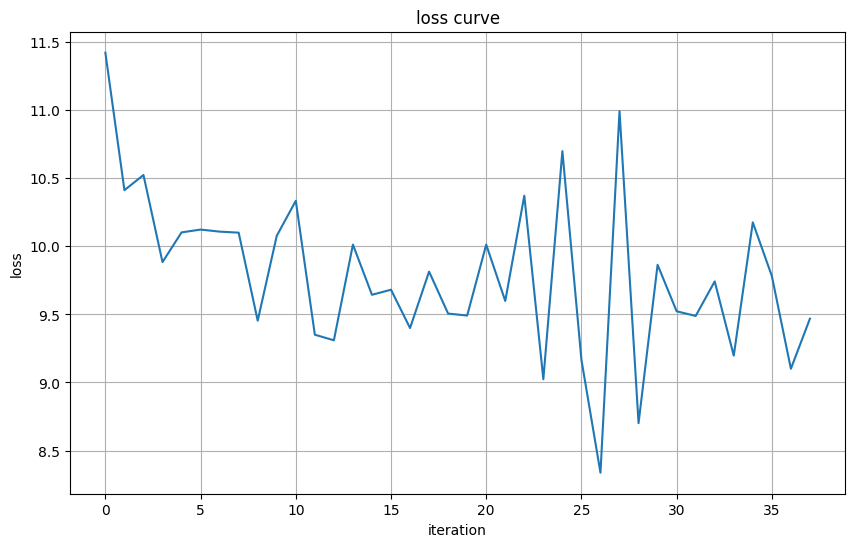

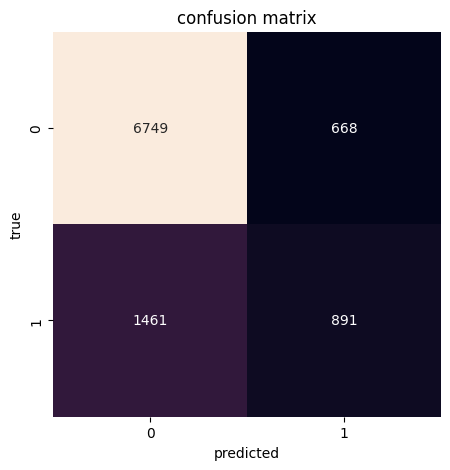

In [27]:
import matplotlib.pyplot as plt
#7.
loss_curve = mlp.loss_curve_
plt.figure(figsize=(10, 6))
plt.plot(loss_curve)
plt.title('loss curve')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()
#8.
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cbar=False)
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()


In [28]:
#9.
person = { 'age': 55,
    'workclass': 'Private',
    'fnlwgt': 150000,
    'education': "Assoc-acdm",
    'education.num': 11,
    'marital.status': "Married-civ-spouse",
    'occupation': "Sales",
    'relationship': "Husband",
    'race': "Asian-Pac-Islander",
    'sex': "Female",
    'capital.gain': 0,
    'capital.loss': 0,
    'hours.per.week': 40,
    'native.country': "United-States"}
df_per = pd.DataFrame([person])
per_dum = pd.get_dummies(df_per)
for t in X_train.columns:
    if t not in per_dum:
        per_dum[t] = 0
per_dum = per_dum[X_train.columns]
predicted_income_class = mlp.predict(per_dum)
predicted_income_class[0]

<ipython-input-28-0a6c5230b40a>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  per_dum[t] = 0
<ipython-input-28-0a6c5230b40a>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  per_dum[t] = 0
<ipython-input-28-0a6c5230b40a>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  per_dum[t] = 0


0